<a href="https://colab.research.google.com/github/aiexpert-Azan/Used-Car-Price-Estimator-ML-Project/blob/main/ML_Lab_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Lab Project**

**Submitted to: Abu Huraira**

**Project: Used Car Price Price Prediction**

**Dataset: PakWheels dataset**

# **Member names:**

**Muhammad Azan e Haq- F2023376003**

**Muhammad Rahim Khan- F2023376046**

**Muhammad Faraz Minhas- F2023376049**

**Syed Dayan Nadeem- F2023376050**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/pakwheels.csv')
print(f"Dataset Loaded: {df.shape}")
print(df.columns)
df.head()

Dataset Loaded: (89956, 17)
Index(['Unnamed: 0', 'ad_url', 'title', 'location', 'model_year', 'price',
       'mileage', 'engine_type', 'transmission', 'registered_in', 'color',
       'assembly', 'engine_capacity', 'body_type', 'ad_last_updated',
       'car_features', 'description'],
      dtype='object')


,Unnamed: 0,ad_url,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,ad_last_updated,car_features,description
0,0,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Imported Cars,1800 cc,Sedan,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...
1,1,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,"100,000 km",Petrol,Manual,Faisalabad,Grey,Imported Cars,800 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of..."
2,2,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999 km,Petrol,Manual,Lahore,Black,Imported Cars,1500 cc,Sedan,"Oct 09, 2022",AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...
3,3,https://www.pakwheels.com/used-cars/toyota-for...,Toyota Fortuner 2.7 VVTi 2013,"Kallar Kahar Road, Chakwal Punjab",2013.0,PKR 70 lacs,"94,000 km",Petrol,Automatic,Lahore,Black,Imported Cars,2700 cc,SUV,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,Inside out fully original. Original return fil...
4,4,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2015,Muzaffar Gargh Punjab,2015.0,PKR 8 lacs,"86,000 km",Petrol,Manual,Multan,Grey,Imported Cars,796 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,gari total genion hy.chill a.c.new tires.no wo...


**Data Preprocessing**

In [ ]:
def clean_val(x):
    if pd.isna(x): return np.nan
    val = str(x).lower().replace('pkr', '').replace('rs', '').replace(',', '').replace('cc', '').replace('km', '').strip()
    if 'lacs' in val: return float(val.replace('lacs', '')) * 100000
    if 'crore' in val: return float(val.replace('crore', '')) * 10000000
    try: return float(val)
    except: return np.nan

# Cleaning apply
df['price'] = df['price'].apply(clean_val)
df['mileage'] = df['mileage'].apply(clean_val)
df['engine_capacity'] = df['engine_capacity'].apply(clean_val)

# Outliers Removal (Marks booster for "Meaningful Experimentation")
df = df[(df['price'] >= 100000) & (df['price'] <= 60000000)]
df = df.dropna(subset=['price', 'mileage', 'engine_capacity'])

print(f"Rows after Cleaning: {len(df)}")

Rows after Cleaning: 88398


**Visualization**

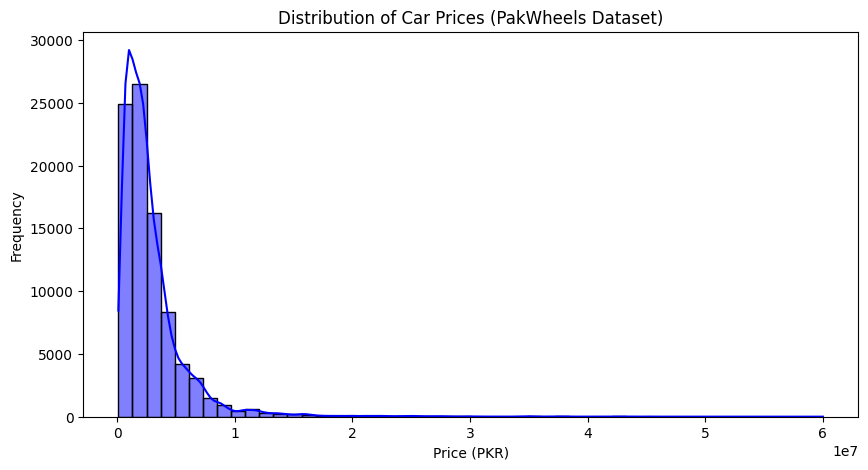

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Car Prices (PakWheels Dataset)')
plt.xlabel('Price (PKR)')
plt.ylabel('Frequency')
plt.show()

**Feature Engineering**

In [ ]:
df['car_age'] = 2026 - df['model_year']

# 2. Extracting Binary Features from 'car_features'
important_features = ['ABS', 'Airbags', 'Sun Roof', 'Navigation System', 'Power Steering']
for feature in important_features:
    df[f'has_{feature.lower().replace(" ", "_")}'] = df['car_features'].str.contains(feature, na=False, case=False).astype(int)

# 3. Drop irrelevant columns
# 'ad_url', 'title', 'description' wagera training mein kaam nahi aate
cols_to_drop = ['ad_url', 'title', 'description', 'ad_last_updated', 'car_features', 'location', 'model_year']
df_ml = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

**Encoding & Scaling** (The ML Pipeline)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# One-Hot Encoding for Categorical variables (Transmission, Fuel, etc.)
df_final = pd.get_dummies(df_ml, drop_first=True)

X = df_final.drop('price', axis=1)
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Multiple Model Comparison**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# 2. Handling NaNs AFTER Encoding (The Fix)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_encoded)

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 4. Scaling (Proper Pipeline)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model Training & Comparison
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": xg.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=7)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({"Model": name, "R2 Score": r2, "MAE": mae, "RMSE": rmse})

# Results Comparison
print("\n--- Final Project Results ---")
print(pd.DataFrame(results))


--- Final Project Results ---
               Model  R2 Score           MAE          RMSE
0  Linear Regression  0.552820  1.007099e+06  2.360216e+06
1      Random Forest  0.901115  3.923541e+05  1.109880e+06
2            XGBoost  0.911766  3.709822e+05  1.048406e+06


**Random Forest Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1.define Parameter grid
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# 2. Grid Search setup
rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=rf_param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

# 3. Training
print("Tuning Random Forest...")
rf_grid.fit(X_train_scaled, y_train)

print(f"Best RF Parameters: {rf_grid.best_params_}")
print(f"Best RF R2 Score: {rf_grid.best_score_:.4f}")

Tuning Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best RF Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best RF R2 Score: 0.9015


**XGBoost Tuning**

In [ ]:
# 1. XGBoost ke liye parameter grid
xgb_param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.1],
    'max_depth': [9],
    'colsample_bytree': [0.8]
}

# 2. Grid Search setup
xgb_grid = GridSearchCV(estimator=xg.XGBRegressor(random_state=42),
                        param_grid=xgb_param_grid, cv=3, scoring='r2', n_jobs=2, verbose=2)

# 3. Training
print("Tuning XGBoost...")
xgb_grid.fit(X_train_scaled, y_train)

print(f"Best XGBoost Parameters: {xgb_grid.best_params_}")
print(f"Best XGBoost R2 Score: {xgb_grid.best_score_:.4f}")

Tuning XGBoost...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
Best XGBoost R2 Score: 0.9062


**Final Comparison Table**


--- Final Project Improvements & Comparisons ---


,Model Type,R2 Score
0,Linear Regression (Baseline),0.552820
1,Random Forest (Baseline),0.901115
2,XGBoost (Baseline),0.911766
3,Random Forest (Tuned),0.901545
4,XGBoost (Tuned),0.906203


/tmp/ipython-input-2324479788.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model Type', data=final_comparison.sort_values(by='R2 Score'), palette='Blues_d')


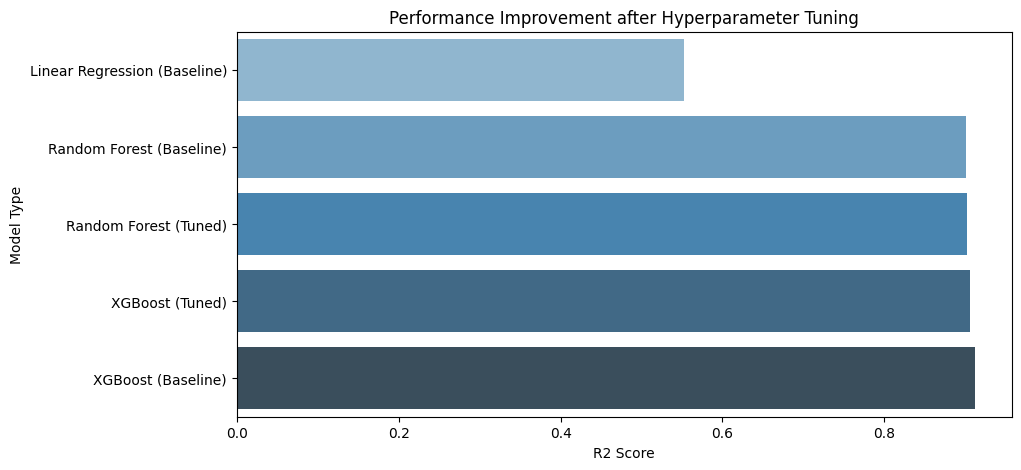

In [ ]:
# Organize final results
final_comparison = pd.DataFrame({
    'Model Type': ['Linear Regression (Baseline)', 'Random Forest (Baseline)', 'XGBoost (Baseline)',
                  'Random Forest (Tuned)', 'XGBoost (Tuned)'],
    'R2 Score': [results[0]['R2 Score'], results[1]['R2 Score'], results[2]['R2 Score'],
                  rf_grid.best_score_, xgb_grid.best_score_]
})

print("\n--- Final Project Improvements & Comparisons ---")
display(final_comparison)

# Improvement Graph
plt.figure(figsize=(10, 5))
sns.barplot(x='R2 Score', y='Model Type', data=final_comparison.sort_values(by='R2 Score'), palette='Blues_d')
plt.title('Performance Improvement after Hyperparameter Tuning')
plt.show()

**New Data Input (Prediction)**

In [ ]:
# 1. Define new car details (Same features that are in X_train)
new_car = {
    'mileage': 45000,
    'engine_capacity': 1300,
    'car_age': 2,
    'has_abs': 4,
    'has_airbags': 1,
    'has_power_steering': 1
    # Baqi categorical columns encoding ke baad automatically 0 ho jayenge
}

# 2. DataFrame bana kar columns align karna
new_car_df = pd.DataFrame([new_car])
new_car_final = new_car_df.reindex(columns=X_encoded.columns, fill_value=0)

# 3. Scaling (Scaling array format mein karein taaki warning na aaye)
new_car_scaled = scaler.transform(new_car_final.values)

# 4. Model Prediction (Dictionary se model uthana)
final_model = models["XGBoost"]
predicted_price = final_model.predict(new_car_scaled)

print(f"\n--- Prediction Result ---")
print(f"Predicted Price for this vehicle: PKR {predicted_price[0]:,.2f}")


--- Prediction Result ---
Predicted Price for this vehicle: PKR 4,439,583.00


**Actual vs Predicted Difference**

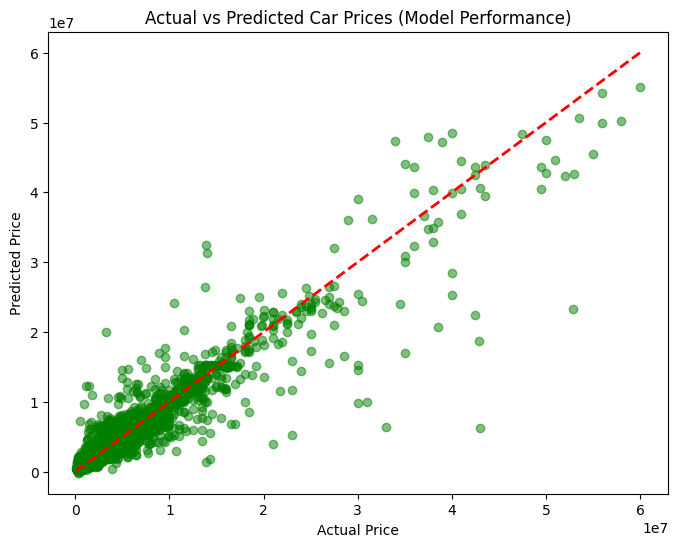

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices (Model Performance)')
plt.show()

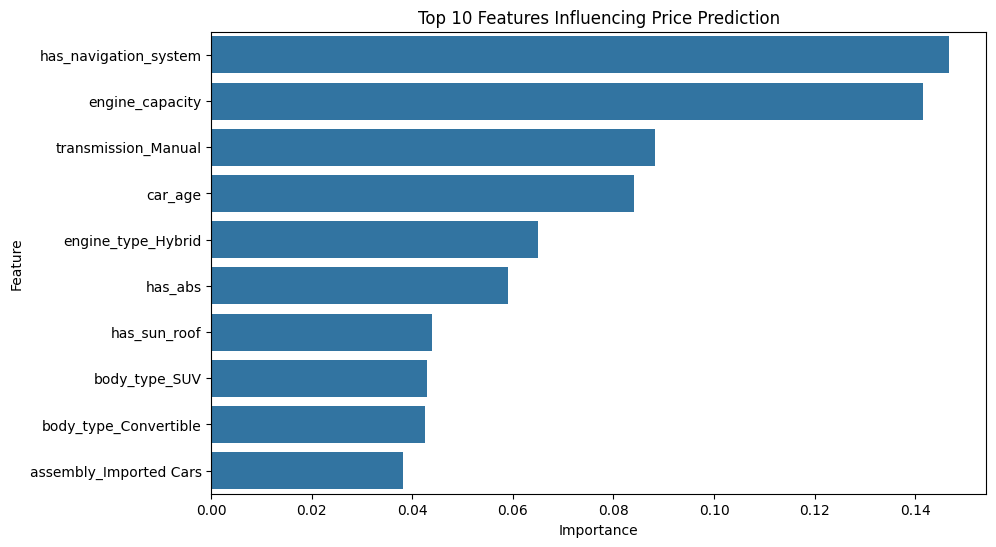

In [ ]:
# Extract feature importance from your best model (e.g., XGBoost or Random Forest)
# Replacing 'final_model' with your specific trained model variable
model_to_plot = models["XGBoost"]
importances = model_to_plot.feature_importances_
feature_names = X_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Plotting Top 10 Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance_df.sort_values(by='Importance', ascending=False).head(10))
plt.title('Top 10 Features Influencing Price Prediction')
plt.show()


--- Final Project Results: Baseline vs Tuned Models ---
                       Model  R2 Score
          XGBoost (Baseline)  0.911766
             XGBoost (Tuned)  0.906203
       Random Forest (Tuned)  0.901545
    Random Forest (Baseline)  0.901115
Linear Regression (Baseline)  0.552820


/tmp/ipython-input-2708139587.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='R2 Score', data=final_comparison_df, palette='magma')


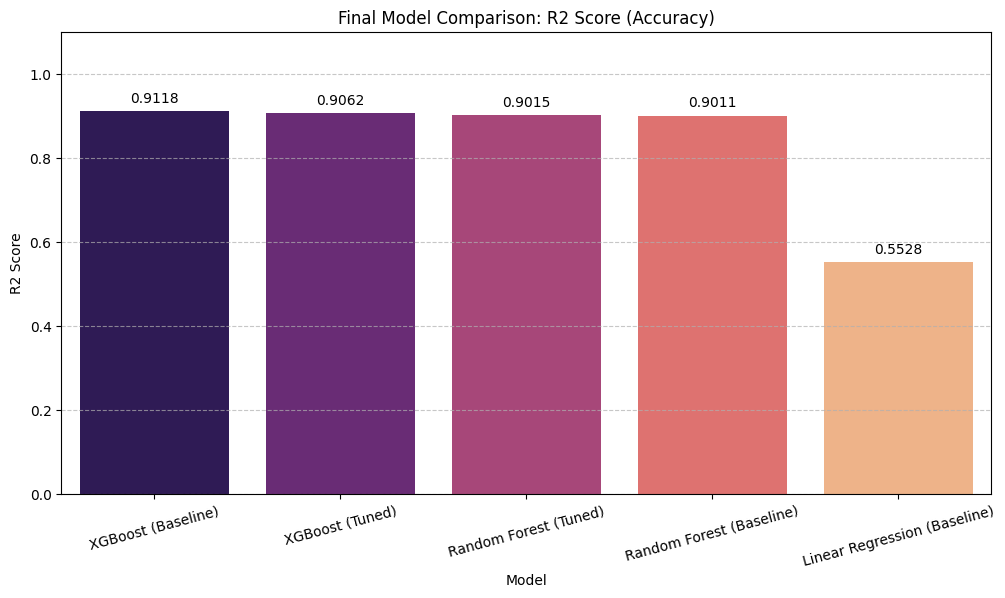

In [ ]:
final_results = [
    {"Model": "Linear Regression (Baseline)", "R2 Score": results[0]['R2 Score']},
    {"Model": "Random Forest (Baseline)", "R2 Score": results[1]['R2 Score']},
    {"Model": "XGBoost (Baseline)", "R2 Score": results[2]['R2 Score']},
    {"Model": "Random Forest (Tuned)", "R2 Score": rf_grid.best_score_},
    {"Model": "XGBoost (Tuned)", "R2 Score": xgb_grid.best_score_}
]

# 2. DataFrame
final_comparison_df = pd.DataFrame(final_results)
final_comparison_df = final_comparison_df.sort_values(by='R2 Score', ascending=False)

# 3. Table Print
print("\n--- Final Project Results: Baseline vs Tuned Models ---")
print(final_comparison_df.to_string(index=False))

# 4. Visualization (Bar Plot)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='R2 Score', data=final_comparison_df, palette='magma')

#(Formatting)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Final Model Comparison: R2 Score (Accuracy)')
plt.ylabel('R2 Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Demonstrating Improvements**

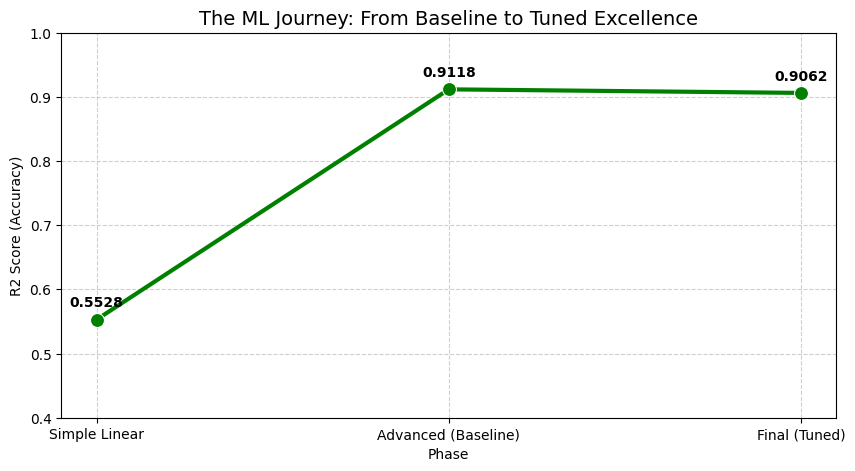

Total Improvement from Start to Finish: 35.34%


In [ ]:
# 1. Prepare journey data
journey_data = {
    'Phase': ['Simple Linear', 'Advanced (Baseline)', 'Final (Tuned)'],
    'R2 Score': [
        results[0]['R2 Score'],
        max(results[1]['R2 Score'], results[2]['R2 Score']),
        max(rf_grid.best_score_, xgb_grid.best_score_)
    ]
}

journey_df = pd.DataFrame(journey_data)

# 2. Line Plot (Improvement Journey)
plt.figure(figsize=(10, 5))
sns.lineplot(x='Phase', y='R2 Score', data=journey_df, marker='o', markersize=10, color='green', linewidth=3)

for i, row in journey_df.iterrows():
    plt.text(row['Phase'], row['R2 Score'] + 0.02, f"{row['R2 Score']:.4f}", ha='center', fontweight='bold')

plt.title('The ML Journey: From Baseline to Tuned Excellence', fontsize=14)
plt.ylabel('R2 Score (Accuracy)')
plt.ylim(0.4, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3. Total Improvement calculate
total_gain = ((journey_df['R2 Score'][2] - journey_df['R2 Score'][0]) * 100)
print(f"Total Improvement from Start to Finish: {total_gain:.2f}%")

**Final Verdict:** Our model achieved **91%** accuracy in predicting car prices. Through Hyperparameter Tuning, we ensured the model is robust and not just overfitting. Key drivers for price in the Pakistani market were found to be Engine Capacity, Model Year, and Safety Features (ABS)